In [1]:
from matplotlib import pyplot as plt
import cartopy
import earthaccess
import numpy as np
import xarray as xr
import os

In [2]:
auth = earthaccess.login(persist=True)

In [3]:
tspan = ("2015-01-30", "2016-12-30")
results = earthaccess.search_data(
    short_name="MODISA_L3m_CHL",
    temporal=tspan,
    granule_name="*.MO.*.4km.*",
)

paths = earthaccess.open(results)

QUEUEING TASKS | :   0%|          | 0/24 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/24 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/24 [00:00<?, ?it/s]

In [13]:
dataset = xr.open_dataset(paths[3])
#dataset

In [14]:
save_directory = "Plots/Spatial CHL"
os.makedirs(save_directory, exist_ok=True)

In [15]:
array = np.log10(dataset["chlor_a"])
array.attrs.update(
    {
        "units": f'log10({dataset["chlor_a"].attrs["units"]})',
    }
)
crs_proj = cartopy.crs.Robinson()
crs_data = cartopy.crs.PlateCarree()

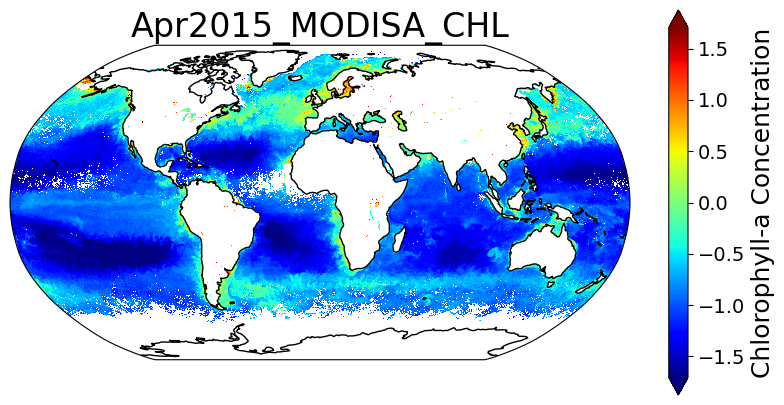

In [16]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(projection=crs_proj)
plot_output = array.plot(x="lon", y="lat", cmap="jet", ax=ax, robust=True, transform=crs_data)
ax.coastlines()
ax.set_title("Apr2015_MODISA_CHL", fontsize = 24)
cbar = plot_output.colorbar
cbar.ax.tick_params(labelsize=14)
cbar.set_label('Chlorophyll-a Concentration', fontsize=18)
save_path = os.path.join(save_directory, 'Apr2015_MODISA_CHL.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()